# Try Window Algorithm
In which we try to implement our own windowing algorithm from first principles, in the hope that it will speed up our smoothing calculations.  Here, by 'windowing', we mean sorting x, y data such that we can apply a smoothing gaussian to the center of each sorted group, and other groups should not contribute.

In [1]:
#%matplotlib notebook
from windowData import *


# create some fake data
That's big enough to take a while to process, but not too long cause we're not made out of time

In [2]:
    %%time
    m = 400
    xs = np.array(range(m), dtype=float)
    ys = np.array(range(m), dtype=float)

    xm, ym = np.meshgrid(xs, ys)

    zs = xm * ym

CPU times: user 17.1 ms, sys: 65.9 ms, total: 83 ms
Wall time: 3.61 ms


In [3]:
from parabolas import imagePlot

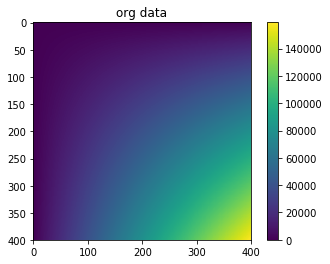

In [4]:
imagePlot(zs, "org data")

## Smooth this data the slow traditional way
In the traditional way we are multiplying the center of our gaussian by the entire data, even though most of that data won't contribute at all to the answer because it is far away.

In [5]:
    %%time
    n = 40
    xLoc, yLoc, zsmooth = smooth(xm.flatten(), ym.flatten(), zs.flatten(), n, sigAz=1., sigEl=1.)

CPU times: user 49.6 s, sys: 103 ms, total: 49.7 s
Wall time: 49.5 s


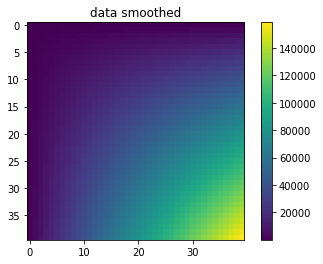

In [6]:
imagePlot(zsmooth, "data smoothed")

## Now window the data first, then smooth

In [7]:
%%time
ws = windowData(xm.flatten(), ym.flatten(), zs.flatten(), n+1)
#zWinSmooth = smoothWin(ws, sigAz=1.0, sigEl=1.0)
#zWinSmooth.shape = (n, n)

windowing by:  41
CPU times: user 1min 20s, sys: 689 ms, total: 1min 20s
Wall time: 1min 20s


In [8]:
%%time
zWinSmooth = smoothWin(ws, sigAz=1.0, sigEl=1.0)
zWinSmooth.shape = (n, n)

CPU times: user 161 ms, sys: 69 µs, total: 161 ms
Wall time: 159 ms


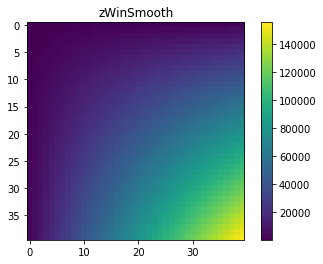

In [9]:
imagePlot(zWinSmooth, "zWinSmooth")

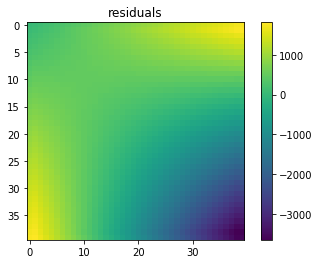

In [10]:
res = zWinSmooth - zsmooth
imagePlot(res, "residuals")

CPU times: user 88.5 ms, sys: 92.4 ms, total: 181 ms
Wall time: 58.2 ms


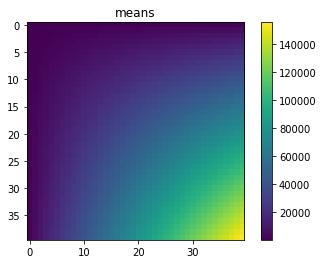

In [11]:
%%time
means = []
for k, v in ws.items():
    ixy, rng, values = v
    _, zzz = values
    means.append(np.mean(zzz))
means = np.array(means)
means.shape = (n, n)
imagePlot(means, "means")

## Conclusions: not faster!
The answer we get using the windowed method seems to be close enough, but seems to take just as long to window the data as it did to just do the smoothing the old way.  Stats:
m = 400, n = 40, old smoothing = ~1 min, windowing = ~ 1 min, windowing smoothing = ~1 sec